# Explore dataset

## Download icons dataset

Downloads data using Kaggle API

In [1]:
import kaggle
from definitions import *

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_name, path=raw_data_dir, unzip=True, quiet=False)

<span style="color:red"> !!! TODO: next steps should be: </span>
    1. Take images from bee1 and bee2 dir and create folder bee and save them there
    2. Take images from wasp1 and wasp2 dir and create foldet wasp and save them there
    3. Delete: example_notebook, label_generator, labels.csv and README.md
    4. Move all remaining folders one level up in a directory tree, to raw_data_dir directory.
        
<span style="color:red"> !!! Now it has to be done manualy </span>         

In [2]:
# work in progres - above steps



## Analize dataset's files

Get labels from dataset directory

In [3]:
import os

labels = [f.name for f in os.scandir(raw_data_dir) if f.is_dir()]

In [4]:
labels

['bee', 'other_insect', 'other_noinsect', 'wasp']

Create list of all images in dataset

In [5]:
files = []
for label in labels:
    label_dir = os.path.join(raw_data_dir, label)
    files += [os.path.join(label_dir, f.name) for f in os.scandir(label_dir) if f.is_file()]

# Remove not images from dataset
not_jpg = [f for f in files if not f.endswith(".jpg")]
print(len(not_jpg))
files = [file for file in files if file not in not_jpg]

1


In [6]:
print(files[0])
print(files[5000])

raw_data\bee\10007154554_026417cfd0_n.jpg
raw_data\other_insect\4757572186_f208cc8a09_n.jpg


Shuffle files

In [7]:
import random

random.shuffle(files)

### Show sample images

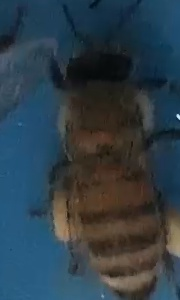

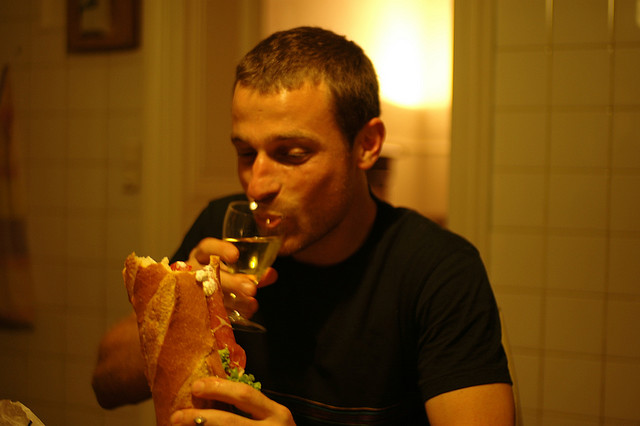

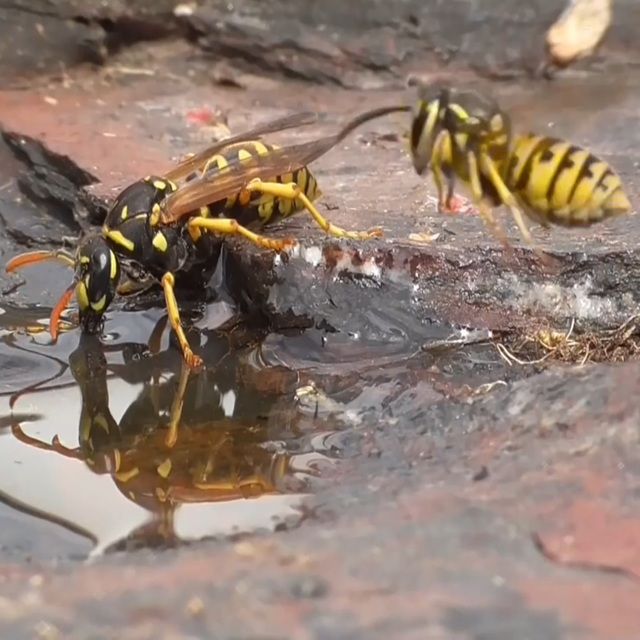

In [8]:
import IPython.display as display

for _ in range(3):
    image_path = random.choice(files)
    display.display(display.Image(image_path))

## Find duplicated images

In [9]:
from collections import Counter

# Find images that are present in multiple labels
fnames = [file.split("\\")[-1] for file in files]

duplicated_names = [(name, count) for name, count in Counter(fnames).items() if count > 1]
duplicated_names = sorted(duplicated_names, key=lambda x: x[1], reverse=True)

print(len(duplicated_names))
duplicated_names[:15]

7


[('4591255979_0457e00e7f_n.jpg', 2),
 ('5812799997_745d664c47_n.jpg', 2),
 ('40465916291_d4ee8d42f2_n.jpg', 2),
 ('30115964458_3710c2a4cb_n.jpg', 2),
 ('9679170523_ea3750e1a1_w.jpg', 2),
 ('26888643508_2f915e650e_n.jpg', 2),
 ('2827307690_9487370a0c_n.jpg', 2)]

## Get list of images sizes 
(**This may take several minutes**)

In [10]:
from PIL import Image

i = 0
limit = 20000 # Set limit to speed it up
images_sizes = Counter()
for i, image_path in enumerate(files[:limit]):
    with Image.open(image_path) as img:
        images_sizes[img.size] += 1 # (width, height)
    if (i + 1) % (limit // 100) == 0:
        print("\rProcessed %d out of %d images" % (i + 1, limit), end="")
        
images_sizes.most_common(100)

Processed 11400 out of 20000 images

[((640, 640), 2707),
 ((320, 240), 1392),
 ((319, 213), 819),
 ((180, 300), 714),
 ((240, 240), 390),
 ((320, 213), 382),
 ((400, 267), 369),
 ((640, 427), 200),
 ((640, 480), 191),
 ((320, 214), 176),
 ((180, 240), 169),
 ((160, 240), 98),
 ((400, 266), 98),
 ((400, 225), 97),
 ((320, 256), 83),
 ((320, 212), 83),
 ((500, 375), 69),
 ((480, 640), 67),
 ((320, 229), 47),
 ((320, 241), 44),
 ((640, 426), 39),
 ((400, 268), 34),
 ((320, 215), 29),
 ((320, 226), 29),
 ((320, 233), 28),
 ((319, 214), 28),
 ((320, 228), 26),
 ((320, 235), 25),
 ((640, 428), 25),
 ((320, 220), 24),
 ((320, 216), 24),
 ((320, 211), 24),
 ((320, 210), 23),
 ((320, 245), 23),
 ((320, 243), 23),
 ((319, 228), 22),
 ((320, 242), 22),
 ((320, 244), 22),
 ((400, 250), 21),
 ((399, 266), 20),
 ((320, 227), 20),
 ((400, 265), 20),
 ((192, 240), 20),
 ((240, 192), 20),
 ((320, 247), 19),
 ((320, 230), 19),
 ((320, 231), 19),
 ((320, 239), 19),
 ((320, 221), 18),
 ((320, 219), 18),
 ((320, 237), 18),
 ((640, 425), 18),

## Count images for each label 

In [11]:
images_count_org = Counter()

for file in files:
    label = file.split("\\")[-2]
    name = file.split("\\")[-1]
    
    images_count_org[label] += 1

In [12]:
print(images_count_org)

Counter({'wasp': 4942, 'bee': 3183, 'other_insect': 2439, 'other_noinsect': 856})


In [13]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

count_data = []
for label, org_count in dict(images_count_org).items():
    count_data.append((label, org_count, org_count))
    
count_data = sorted(count_data, reverse=True, key=lambda x: x[2])
labels, org_count, sum_count = zip(*count_data)

trace_org = go.Bar(
    x=labels,
    y=org_count,
    name='Orginal images count'
)

data = [trace_org]
layout = go.Layout(
    barmode='stack',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Concluston ###
 Should we augment mostly other_insects  and bee as these image sets ae smaller than wasps? 

